## Atividade Prática 1: Amostragem e rebatimento

### Nome: Diogo José Costa Alves

### N⁰ USP: 13709881

Nessa tarefa exploraremos a amostragem de sinais e imagens sintetizados a partir de funções senoidais, e o efeito de rebatimento resultante da relação entre a taxa de amostragem e a frequência do sinal.

#### Dependências dessa tarefa

In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

#### Exercício 1:

(a) construa um sinal de 1 seg de duração com frequência f = 2000 Hz e taxa de amostragem R = 40000 Hz:

$$x(t) = \sin(2\pi f t)\quad\quad t=0,\frac{1}{R},\frac{2}{R},\ldots,1-\frac{1}{R}$$

(b) Plote um trecho do sinal correspondente a 4 períodos completos (ou seja, quando $2\pi ft=4\cdot 2\pi$).

(c) Adicione um widget para reproduzir o sinal (já resolvido).

**CUIDADO** com o volume ao ouvir o sinal (comece com o volume no mínimo e aumente até um nível confortável para os seus fones de ouvido).

In [5]:
# Exercício 1(a)
# Dicas: não use laços! Use np.arange(0,1,1/R) para construir um vetor t
# e passe para a função np.sin uma expressão usando o vetor t

duration = 1 # um segundo
f = 2000     # 2000 Hz
R = 40000    # 40000 Hz
t = np.arange(0, duration, 1/R)

x = np.sin(2*m.pi*f*t)

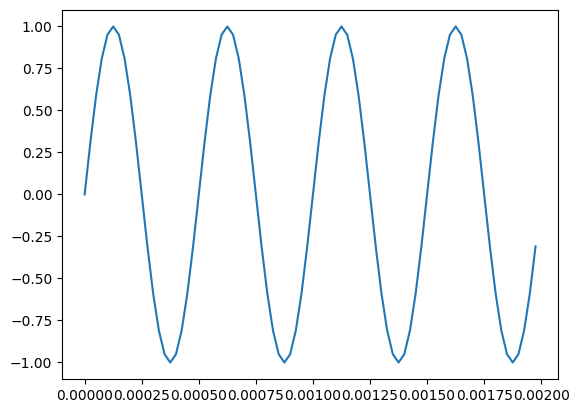

In [21]:
# Exercício 1(b)
# Dica: use plt.plot(tempo,sinal)
duration_sub = 4/f
# essa valor da duration sub pode vir tanto da equação que ele colocou
# quanto da seguinte regra de três 1 segundo ---> 2000 voltas assim como x segundos ---> 4 
t_sub = np.arange(0,duration_sub,1/R)
x_sub = np.sin(2*m.pi*f*t_sub)
plt.plot(t_sub, x_sub)

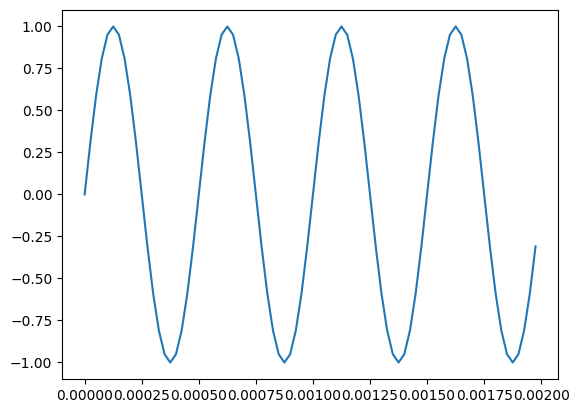

In [29]:
# Exercício 1(b)
# Dica: use plt.plot(tempo,sinal)
# agora filtrando direto o t
# a mesma regra de três pode ser estendida ao númeo de amostras
# 1 segundo  ---> 2000 voltas ---> 40000 amostras
# x segundos --->    4 voltas --->     y amostras
nr_amostras = int( 4 * (R/f) ) # 80 amostras
t_sub=t[0:nr_amostras]
x_sub = np.sin(2*m.pi*f*t_sub)
plt.plot(t_sub, x_sub)

In [30]:
# Exercício 1(c) resolvido
display(Audio(x, rate=R, normalize=False))

#### Exercício 2:

Repita a construção do exercício 1 com a mesma frequência f = 2000 Hz e taxas de amostragem R = 8000 Hz, depois R = 4000 Hz e finalmente R = 3000 Hz. Comente na célula após o código as diferenças visuais e auditivas observadas, se houver.

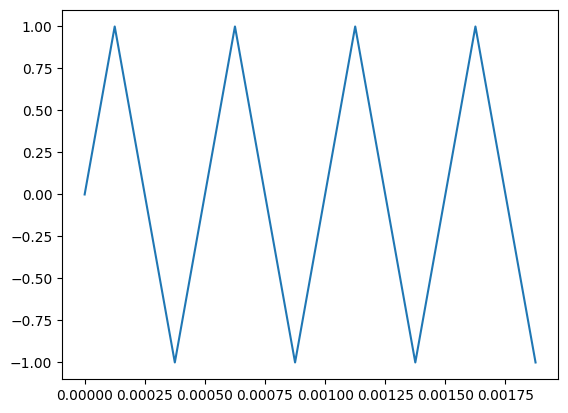

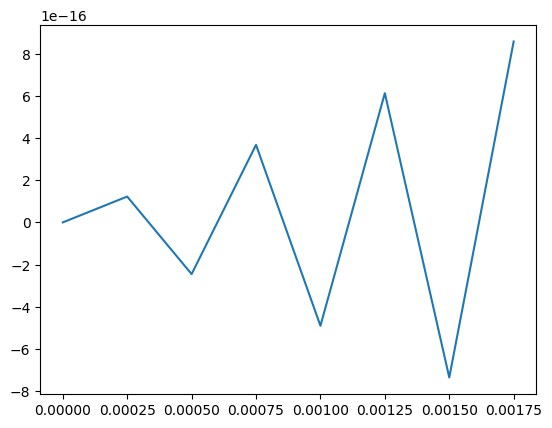

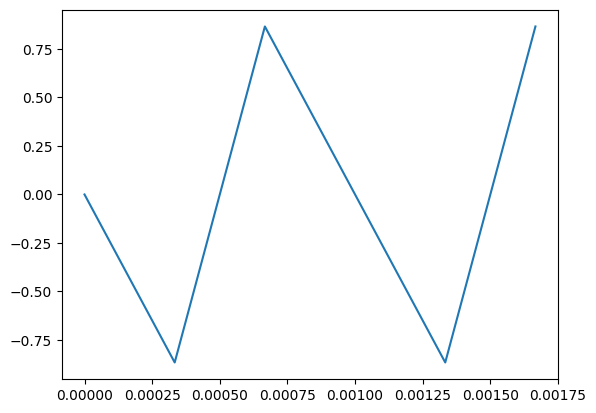

In [45]:
# Exercício 2
# Dica: para separar os gráficos, divida a célula (Edit→Split Cell)
#       ou então use plt.figure() antes de cada plt.plot()

duration = 1 # 1 segundo
f = 2000     # 2000 Hz

Rs = [8000, 4000, 3000]

for r in Rs:
    t = np.arange(0, 1, 1/r)
    x = np.sin(2*m.pi*f*t)

    # número de amostras equivalentes a 4 períodos completos
    nr_amostras = int( 4 * (r/f) )
    
    plt.figure()
    plt.plot(t[0:nr_amostras], x[0:nr_amostras])
    display(Audio(x, rate=r, normalize=False))

#### Inclua aqui os comentários referentes ao exercício 2

1. Nesse exercício amostramos um sinal com frequência de 2000 Hz em 3 amostragens distintas.
2. A primeira amostragem R=8000Hz, é suficiente para captar o sinal, já que segundo o critério de nyquist f=2000Hz está dentro do intervalo -R/2 <= f < R/2. Visualmente o gráfico apresenta 4 períodos completos. O áudio dessa amostragem soa igual ao do exemplo 1.
3. A segunda amostragem R=4000Hz, parece ser um caso limite, já que essa taxa de amostragem não foi suficiente para o sinal original. Visualmente o gráfico apresenta quase 4 picos, mas com um certo deslocamento. Dá para perceber que o eixo y tem valores muito menores que o primeiro gráfico, são valores mais próximos de 0. O áudio em sim soa silencioso. Provavelmente porque a maioria dos momentos da amostragem coincidem com momentos de baixa amplitude do sinal original.
4. A terceira amostragem R=3000Hz, é insuficiente para captura o sinal original. Visualmente conseguimos perceber quase 2 períodos ao invés do 4 do sinal sinal original. O sinal foi rebatido para f1-f2 = kR, f1=2000, f2=?, kR=(-1)*3000 f2=-1000Hz. O áudio soa mais grave, como uma sequência mais baixa que o exemplo 1.

#### Exercício 3:

(a) Construa um gráfico sobrepondo as formas de onda com R = 40000 Hz e R = 4000 Hz, e um segundo gráfico sobrepondo as formas de onda com R = 40000 Hz e R = 3000 Hz.

(b) Estime a frequência aparente dos sinais produzidos com R = 4000 Hz e R = 3000 Hz a partir dos gráficos do item (a).

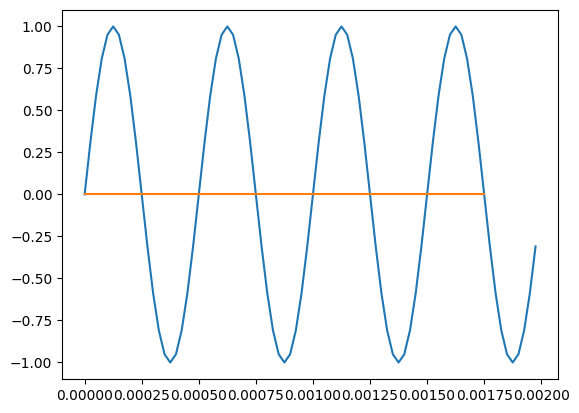

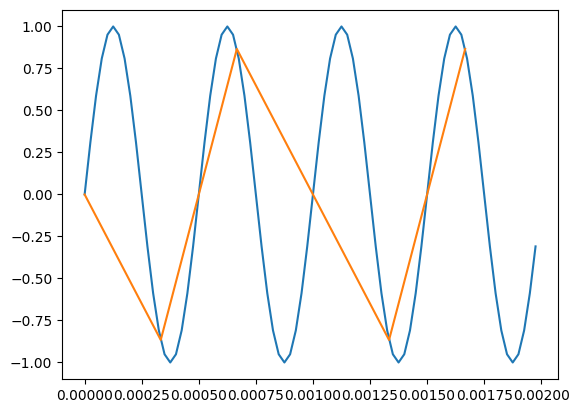

In [47]:
# Exercício 3(a)
# Dica: para sobrepor os gráficos basta fazer chamadas consecutivas da função plt.plot()
#       dentro de uma mesma célula (ou após um mesmo plt.figure())
duration = 1 # 1 segundo
freq = 2000  # 2000 Hz
Rs = [40000, 4000]
for r in Rs:
    t = np.arange(0, duration, 1/r)
    x = np.sin(2*m.pi*f*t)
    
    # pegamento apenas o equivalente a 4 ciclos completos
    nr_amostras = int(4 * (r/f))
    plt.plot(t[0:nr_amostras],x[0:nr_amostras])
    display(Audio(x, rate=r, normalize=False))

plt.figure()

Rs = [40000, 3000]
for r in Rs:
    t = np.arange(0, duration, 1/r)
    x = np.sin(2*m.pi*f*t)
    
    # pegamento apenas o equivalente a 4 ciclos completos
    nr_amostras = int(4 * (r/f))
    plt.plot(t[0:nr_amostras],x[0:nr_amostras])
    display(Audio(x, rate=r, normalize=False))


#### Inclua aqui os comentários referentes ao exercício 3(b)

Estime a frequência aparente dos sinais produzidos com R = 4000 Hz e R = 3000 Hz a partir dos gráficos do item (a).

1. A amostragem com R=4000 Hz gera o sinal com frequência aparente de f=0 Hz.   Aparentemente os momentos de amostragem coincidiram o valores de baixa amplitude do sinal o original. 
2. A amostragem com R=3000 Hz geram um sinal com frequência aparente de f=-1000Hz. O sinal negativo se refere a diferença de fase no início. 

#### Exercício 4:

Calcule as frequências equivalentes $f$ na faixa $-\frac{R}{2}<f\le \frac{R}{2}$ que correspondem exatamente aos sinais digitais gerados no exercício 2 com R = 4000 Hz e R = 3000 Hz, a partir da condição de rebatimento associada às frequências equivalentes da forma $f\pm kR$ com $k\in\mathbb{Z}$. Há alguma diferença importante entre os exemplos com R = 4000 Hz e R = 3000 Hz? Explique.

#### Inclua aqui as contas e comentários referentes ao exercício 4

1. A taxa de amostragem R=4000Hz, segundo o critério de nyquist é suficiente para amostrar o sinal sem rebatimento de até R/2 ou 2000Hz, acontece que no exemplo, os momentos de amostragem estão sincronizados com o período do sinal, bem no momento de amplitude igual a zero. A frequência aparente é de 0Hz
2. A taxa de amostragem R=3000Hz, é suficiente para representar a faixa -1500Hz < f <= 1500Hz, portanto insuficiente para amostrar o sinal original de 2000Hz. A frequência aparente é encontrada para o primeiro múltiplo de R. q1 - q2 = 1*3000. q1=2000, q2 será igual a -1000 Hz.

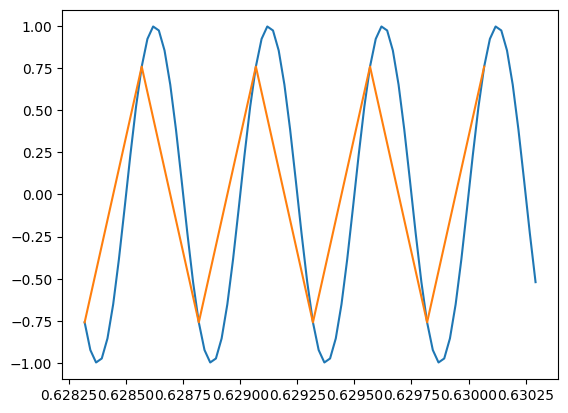

In [63]:
# aqui eu tentei deslocar o momento de amostragem do sinal. Visualmente é posivel perceber que o sinal amostrado com 4000Hz passa a aparecer no gráfico.
# não entendo bem por que ele ainda soa como silêncio.
duration = 1 # 1 segundo
freq = 2000  # 2000 Hz
Rs = [40000, 4000]
teco = .1 * 2*m.pi
for r in Rs:
    t = np.arange(0 + teco, duration + teco, 1/r)
    x = np.sin(2*m.pi*f*t)
    
    # pegamento apenas o equivalente a 4 ciclos completos
    nr_amostras = int(4 * (r/f))
    plt.plot(t[0:nr_amostras],x[0:nr_amostras])
    display(Audio(x, rate=r, normalize=False))

#### Exercício 5:

Considere a função

$$f(x,y)=\sin(2\pi(50x+70y))$$

definida no retângulo $(x,y)\in[0,1]\times[0,1]$. O código abaixo contrói as imagens correspondentes a essa função, usando taxas de amostragem iguais nas duas variáveis com os valores $R=50,60,70,80,700$ (ciclos por unidade espacial).

Justifique na célula após o código os padrões observados em função das frequências aparentes/equivalentes $f_x,f_y\in\left(-\frac{R}{2},\frac{R}{2}\right]$. Considere que as frequências nominais $g_x=50$ e $g_y=70$ correspondem às flutuações horizontais e verticais, respectivamente.

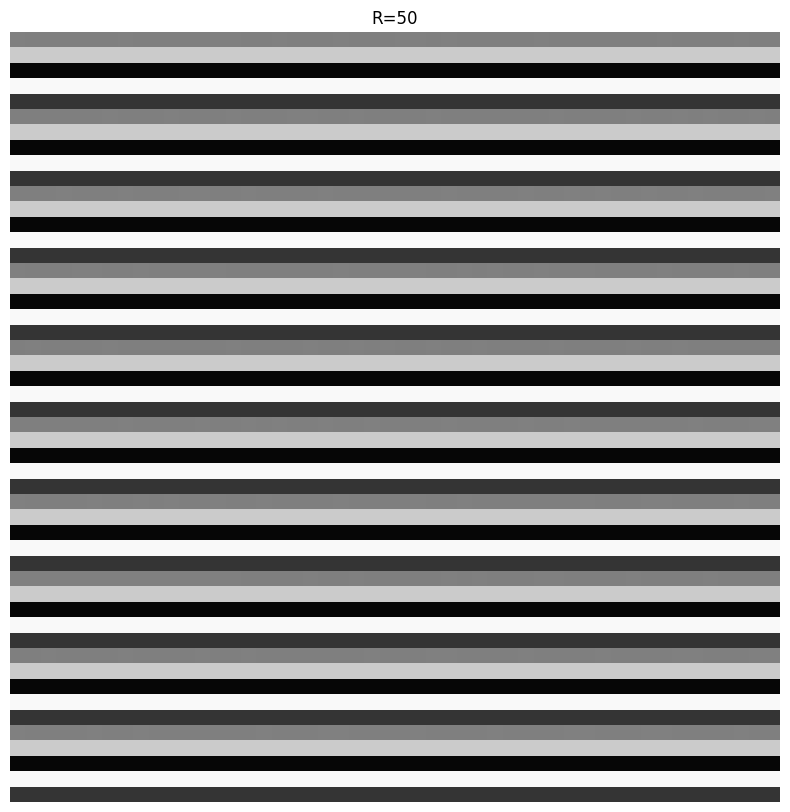

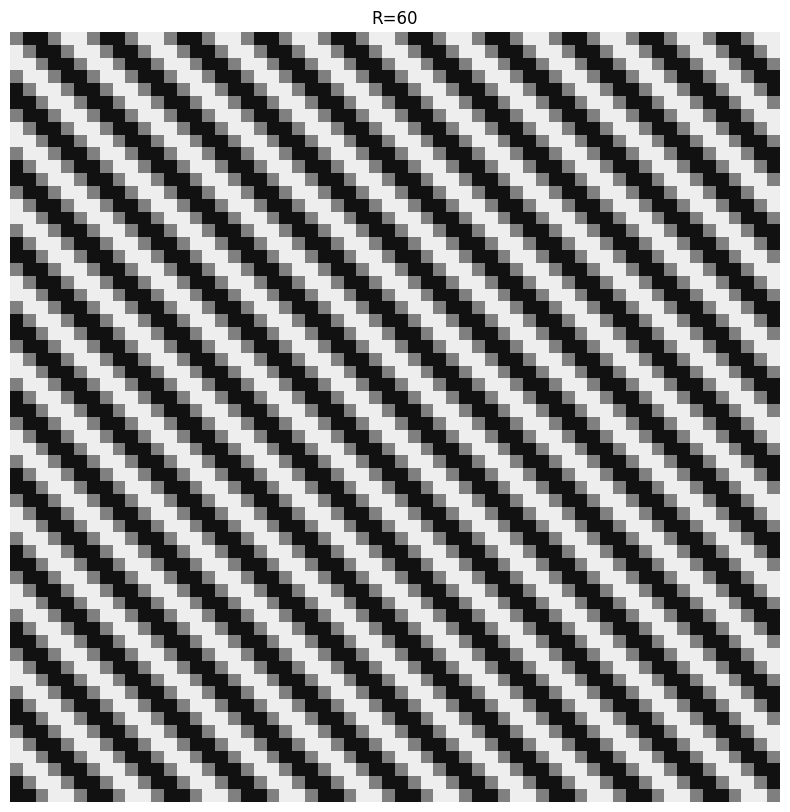

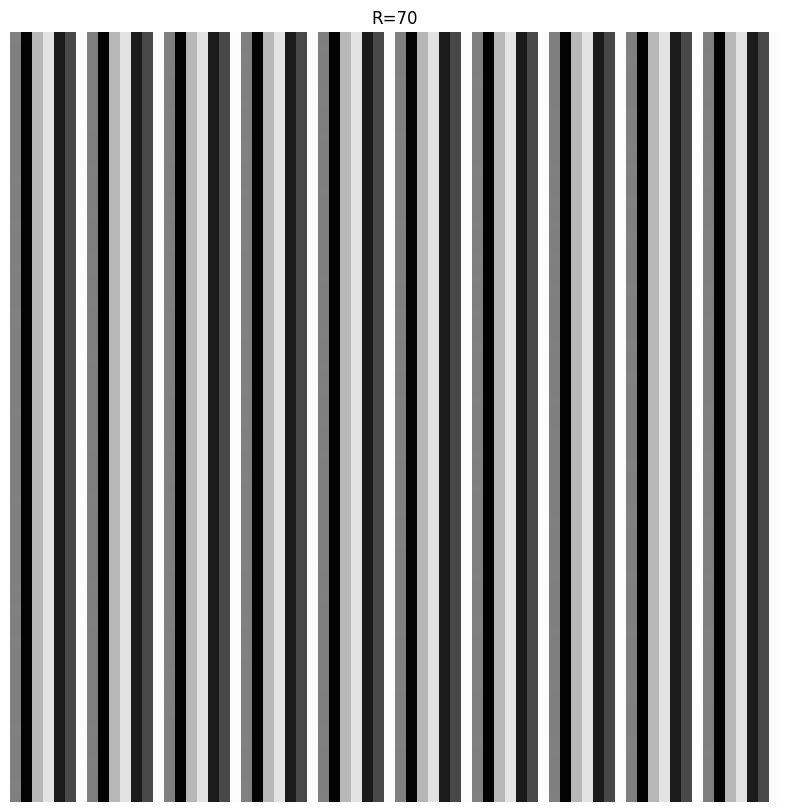

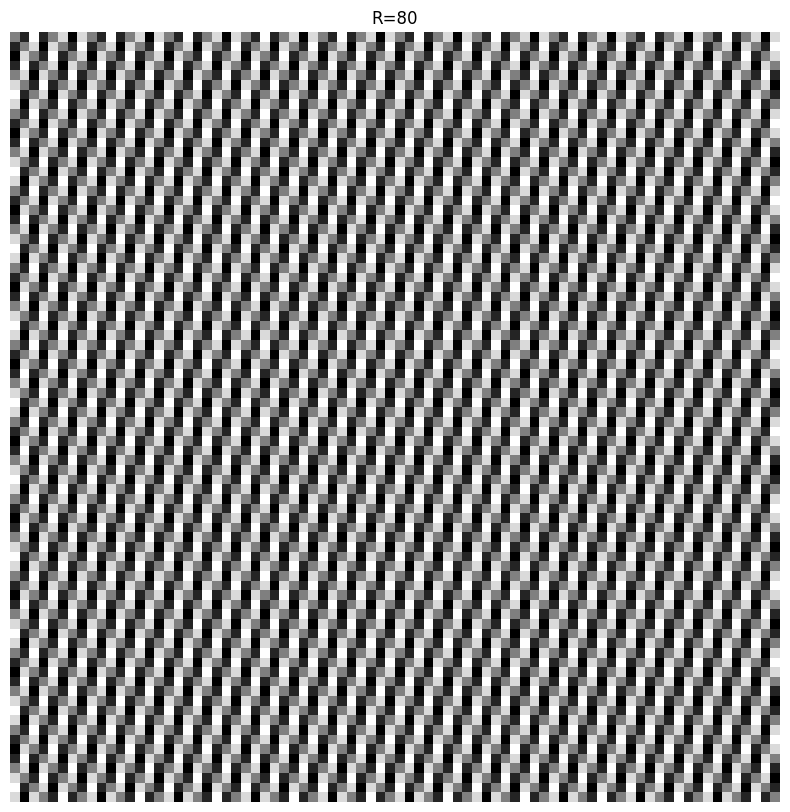

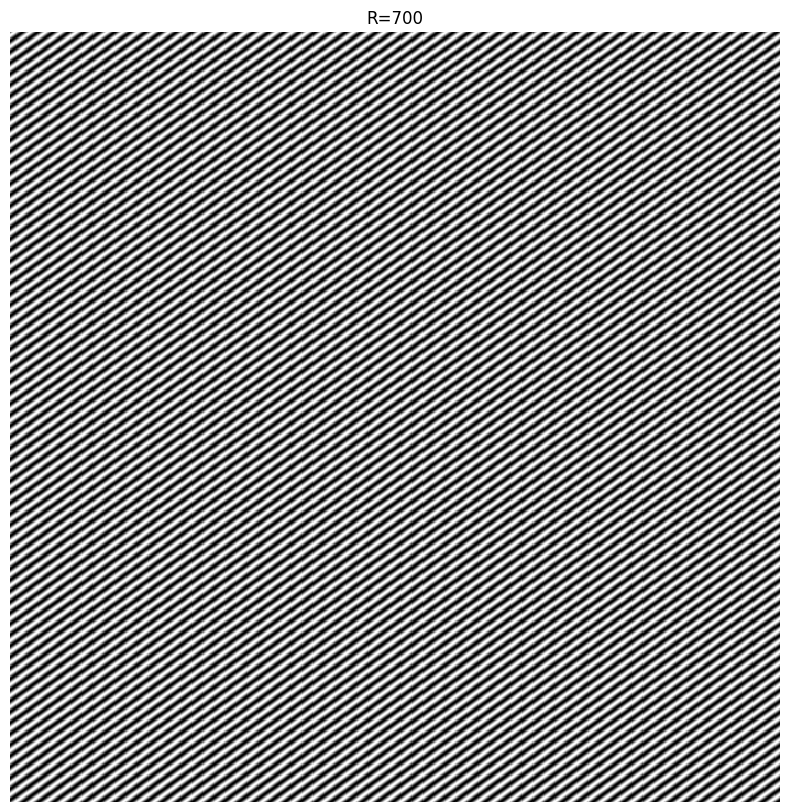

In [64]:
R=[50,60,70,80,700]
for j in range(len(R)):
    x = np.arange(0,1,1/R[j])
    y = np.arange(0,1,1/R[j])
    # np.meshgrid(x,y) retorna duas matrizes X e Y
    # onde cada linha de X contém uma cópia do vetor x
    # e cada coluna de Y uma cópia do vetor y.
    X, Y = np.meshgrid(x,y,indexing='xy')
    f = np.sin(2 * m.pi * (50*X + 70*Y))
    plt.figure(figsize=(10,10))
    plt.imshow(f, interpolation="none", cmap='gray', vmin=-1, vmax=+1)
    plt.title(r'R={}'.format(R[j]))
    plt.axis('off')

#### Inclua aqui as contas e comentários referentes ao exercício 5:

- O sinal original possui frequências nominais gx=50Hz e gy=70hz.
- As frequência aparentes fx e fy estão relacionadas a amostragem do sinal.

1. A amostragem R=50Hz é suficiente para representar sinais (-25Hz, 25Hz]. Portanto, as componentes horizontal e vertical são são rebatidas.
- A frequência aparente fx será de 0Hz. gx-fx=kR, 50-fx=1*50
- A frequência aparente fy será de 20Hz. gy-fy=kR, 70-fy=1*50

2. A amostragem R=60Hz é suficiente para representar sinais (-30Hz, 30Hz]. Portanto, as componentes horizontal e vertical são são rebatidas.
- A frequência aparente fx será de -10Hz. gx-fx=kR, 50-fx=1*60
- A frequência aparente fy será de 10Hz. gy-fy=kR, 70-fy=1*60

3. A amostragem R=70Hz é suficiente para representar sinais (-35Hz, 35Hz]. Portanto, as componentes horizontal e vertical são são rebatidas.
- A frequência aparente fx será de -20Hz. gx-fx=kR, 50-fx=1*70
- A frequência aparente fy será de 0Hz. gy-fy=kR, 70-fy=1*70

4. A amostragem R=80Hz é suficiente para representar sinais (-40Hz, 40Hz]. Portanto, as componentes horizontal e vertical são são rebatidas.
- A frequência aparente fx será de -30Hz. gx-fx=kR, 50-fx=1*80
- A frequência aparente fy será de -10Hz. gy-fy=kR, 70-fy=1*80

5. A amostragem R=700Hz é suficiente para representar sinais (-350Hz, 350Hz]. Portanto, as componentes horizontal e vertical são serão perfeitamente representadas.
- A frequência aparente fx será de 50Hz
- A frequência aparente fy será de 70Hz

